# Prediction of COVID-19 Confirmed cases around the world

 
Dataset Information

Date - Date of the observation in MM/DD/YYYY
Lat - Latitude
Long - Longitude
Province/State - Province or state of the observation
Country/Region - Country of observation
Confirmed - Cumulative number of confirmed cases
Deaths - Cumulative number of of deaths 
Recovered - Cumulative number of recovered cases 
Active - Cumulative number of Active cases
WHO Region - World Heath Organization Region



## Importing libraries

In [1]:
#Data analysis and exploration libraries
import numpy as np
import pandas as pd

#Missing data handling library
from sklearn.impute import SimpleImputer

#Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Datetime conversion library
from datetime import timedelta

#Hyperprameter tuning library
from sklearn.model_selection import RandomizedSearchCV


#Model building libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

#Performance evaluation library
from sklearn import metrics
from sklearn.metrics import mean_squared_error



## Dataset Analysis

### Loading dataset

In [2]:
covid19 = pd.read_csv("covid19_data.csv")

### Shape of Dataset

In [3]:
covid19.shape

(49068, 10)

### Dataset headers

In [4]:
covid19.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

### Head of Dataframe

In [5]:
covid19.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,22-01-2020,0,0,0,0.0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,22-01-2020,0,0,0,NaN,Europe
2,NaN,Algeria,28.03390,1.659600,22-01-2020,0,0,0,NaN,Africa
3,NaN,Andorra,42.50630,1.521800,22-01-2020,0,0,0,NaN,Europe
4,NaN,Angola,-11.20270,17.873900,22-01-2020,0,0,0,NaN,Africa


### Tail of Dataframe

In [6]:
covid19.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,27-07-2020,865,14,734,117.0,Africa
49064,NaN,Yemen,15.552727,48.516388,27-07-2020,1691,483,833,375.0,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,27-07-2020,354,7,328,19.0,Africa
49066,NaN,?,38.861000,71.276100,27-07-2020,7235,60,6028,1147.0,Europe
49067,NaN,Lesotho,-29.610000,28.233600,27-07-2020,505,12,128,365.0,Africa


### Dataframe Information

In [7]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  object 
 7   Recovered       49068 non-null  object 
 8   Active          48160 non-null  float64
 9   WHO Region      49068 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.7+ MB


### Datatypes

In [8]:
print(covid19.dtypes)

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths             object
Recovered          object
Active            float64
WHO Region         object
dtype: object


## Data Cleaning and Preprocessing

In [9]:
covid19.drop(['Province/State','WHO Region'], axis=1, inplace=True)
covid19.head(10)

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,33.93911,67.709953,22-01-2020,0,0,0,0.0
1,Albania,41.15330,20.168300,22-01-2020,0,0,0,NaN
2,Algeria,28.03390,1.659600,22-01-2020,0,0,0,NaN
3,Andorra,42.50630,1.521800,22-01-2020,0,0,0,NaN
4,Angola,-11.20270,17.873900,22-01-2020,0,0,0,NaN
5,Antigua and Barbuda,17.06080,-61.796400,22-01-2020,0,0,0,NaN
6,Argentina,-38.41610,-63.616700,22-01-2020,0,0,0,NaN
7,Armenia,40.06910,45.038200,22-01-2020,0,0,0,NaN
8,Australia,-35.47350,149.012400,22-01-2020,0,0,0,NaN
9,?,-33.86880,151.209300,22-01-2020,0,0,0,NaN


### Missing value analysis

In [10]:
covid19=covid19.replace('?', np.nan)

In [11]:
print(covid19.isnull().sum())

Country/Region     65
Lat                 0
Long                0
Date                0
Confirmed           0
Deaths             50
Recovered          26
Active            908
dtype: int64


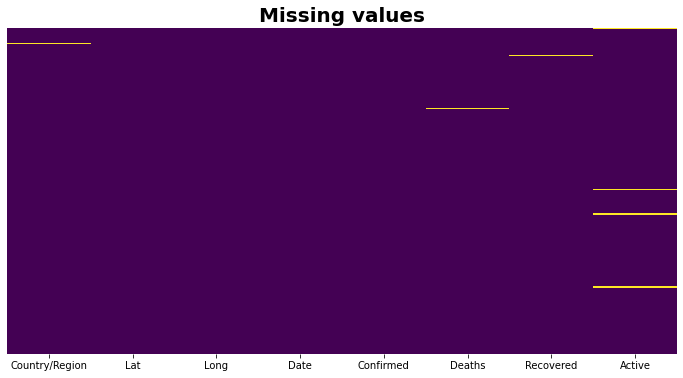

In [12]:
#Visualizing missing values

plt.figure(figsize=(12, 6))
plt.title("Missing values",size='20',weight='bold')
sns.heatmap(covid19.isnull(),yticklabels=False,cbar=False,cmap='viridis');


### Missing value handling

In [13]:
#Missing data handling in column Deaths

imp = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imp = imp.fit(covid19[['Deaths']])
covid19['Deaths'] = imp.transform(covid19[['Deaths']]).ravel()

In [14]:
#Missing data handling in column Country/Region

cols = ['Country/Region','Active']
covid19.loc[:,cols] = covid19.loc[:,cols].ffill()

In [15]:
#Missing value handling in column Recovered

imp = SimpleImputer(missing_values=np.nan,strategy="mean")
imp = imp.fit(covid19[['Recovered']])
covid19['Recovered'] = imp.transform(covid19[['Recovered']]).ravel()

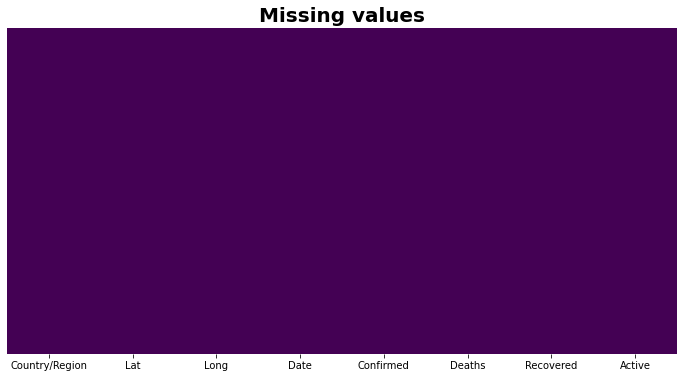

In [16]:
#Visualizing missing values

plt.figure(figsize=(12, 6))
plt.title("Missing values",size='20',weight='bold')
sns.heatmap(covid19.isnull(),yticklabels=False,cbar=False,cmap='viridis');


### Datatype Conversion

In [17]:
covid19.dtypes

Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths             object
Recovered         float64
Active            float64
dtype: object

In [18]:
covid19["Deaths"] = covid19["Deaths"].astype(str).astype(float)

In [19]:
covid19 = pd.read_csv("covid19_clean.csv")

### Converting Date to Datetime type

In [20]:
covid19['Date'] = pd.to_datetime(covid19['Date'])

## Data Visualization

In [21]:
byDate = covid19.groupby(['Date']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})

### Data Correlation

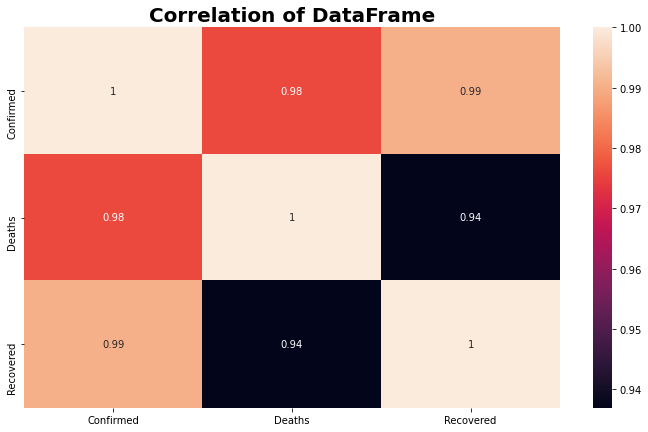

In [22]:
#Correlation

plt.figure(figsize=(12, 7))
plt.title("Correlation of DataFrame",size='20',weight='bold')
sns.heatmap(byDate.corr(),annot=True);

### Total Number of Covid19 cases all over the world

Total number of confirmed cases all over the world:  16480485
Total number of recovered cases all over the world:  9468087
Total number of deaths all over the world:           654036
Total number of active cases all over the world:     6358362
Total number of closed cases all over the world:     10122123


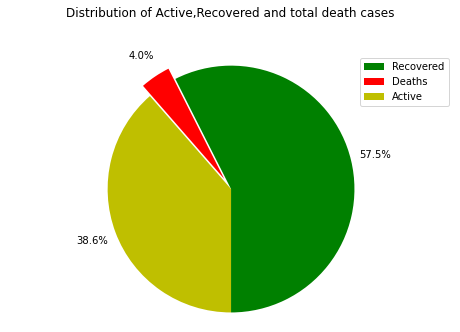

In [23]:
#grouping confirmed,Deaths and Recovered as per the date and printing the data for the last date for which we have data
print('Total number of confirmed cases all over the world: ',byDate['Confirmed'].iloc[-1])
print('Total number of recovered cases all over the world: ',byDate['Recovered'].iloc[-1])
print('Total number of deaths all over the world:          ',byDate['Deaths'].iloc[-1])
print('Total number of active cases all over the world:    ',byDate['Confirmed'].iloc[-1]-byDate['Recovered'].iloc[-1]-byDate['Deaths'].iloc[-1])
print('Total number of closed cases all over the world:    ',byDate['Recovered'].iloc[-1]+byDate['Deaths'].iloc[-1])
labels = ['Recovered','Deaths','Active']
sizes = [byDate['Recovered'].iloc[-1],byDate['Deaths'].iloc[-1],byDate['Confirmed'].iloc[-1]-byDate['Recovered'].iloc[-1]-byDate['Deaths'].iloc[-1]]
colors = ['g','r','y']
explode = [0,0.1,0]
plt.figure(figsize=(8,5))
plt.pie(sizes,autopct='%1.1f%%',pctdistance=1.2,explode=explode,colors = colors,startangle=-90)
plt.axis('equal')
plt.title('Distribution of Active,Recovered and total death cases\n\n')
plt.legend(labels=labels,loc='upper right')
plt.show()

### Weekly Covid19 cases

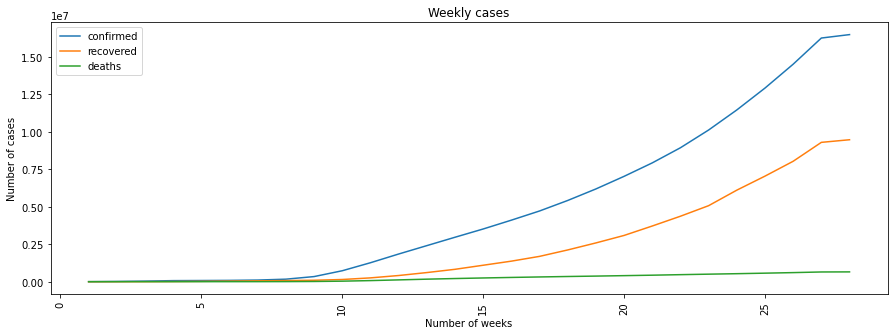

In [24]:
byDate['Weekly'] = byDate.index.weekofyear
week_number = []
weekly_confirmed = []
weekly_recovered = []
weekly_deaths = []

week = 1
for i in list(byDate['Weekly'].unique()):
  weekly_confirmed.append(byDate[byDate['Weekly']==i]['Confirmed'].iloc[-1])
  weekly_recovered.append(byDate[byDate['Weekly']==i]['Recovered'].iloc[-1])
  weekly_deaths.append(byDate[byDate['Weekly']==i]['Deaths'].iloc[-1])
  week_number.append(week)
  week = week+1

plt.figure(figsize = (15,5))
sns.lineplot(week_number,weekly_confirmed,label='confirmed')
sns.lineplot(week_number,weekly_recovered,label='recovered')
sns.lineplot(week_number,weekly_deaths,label='deaths')
plt.title('Weekly cases')
plt.xlabel('Number of weeks')
plt.ylabel('Number of cases')
plt.legend()
plt.xticks(rotation=90)
plt.show()

### Weekly increase in Covid19 cases

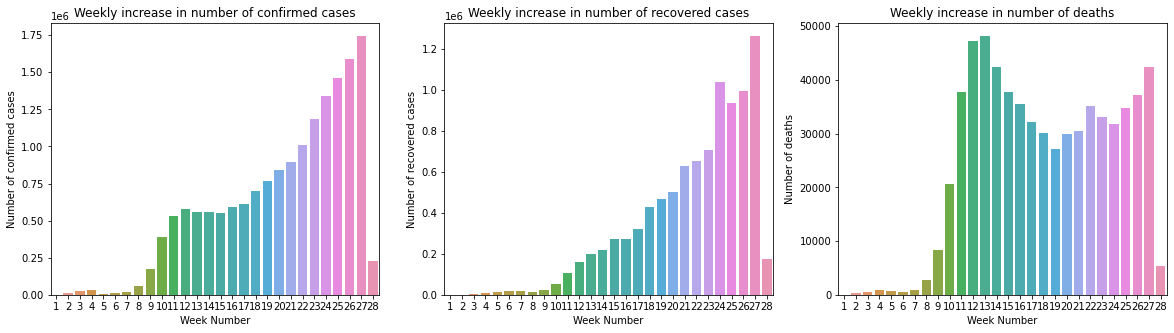

In [25]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
plt.subplots_adjust(hspace=1, wspace=0.2)
sns.barplot(x=week_number,y=pd.Series(weekly_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_number,y=pd.Series(weekly_recovered).diff().fillna(0),ax=ax2)
sns.barplot(x=week_number,y=pd.Series(weekly_deaths).diff().fillna(0),ax=ax3)
ax1.set_xlabel('Week Number')
ax2.set_xlabel('Week Number')
ax3.set_xlabel('Week Number')
ax1.set_ylabel('Number of confirmed cases')
ax2.set_ylabel('Number of recovered cases')
ax3.set_ylabel('Number of deaths')
ax1.set_title('Weekly increase in number of confirmed cases')
ax2.set_title('Weekly increase in number of recovered cases')
ax3.set_title('Weekly increase in number of deaths')
plt.show()

### Daily increase in Covid19 cases

Average increase in number of confirmed cases everyday:  87659.0
Average increase in number of recovered cases everyday:  50362.0
Average increase in number of deaths everyday:           3479.0





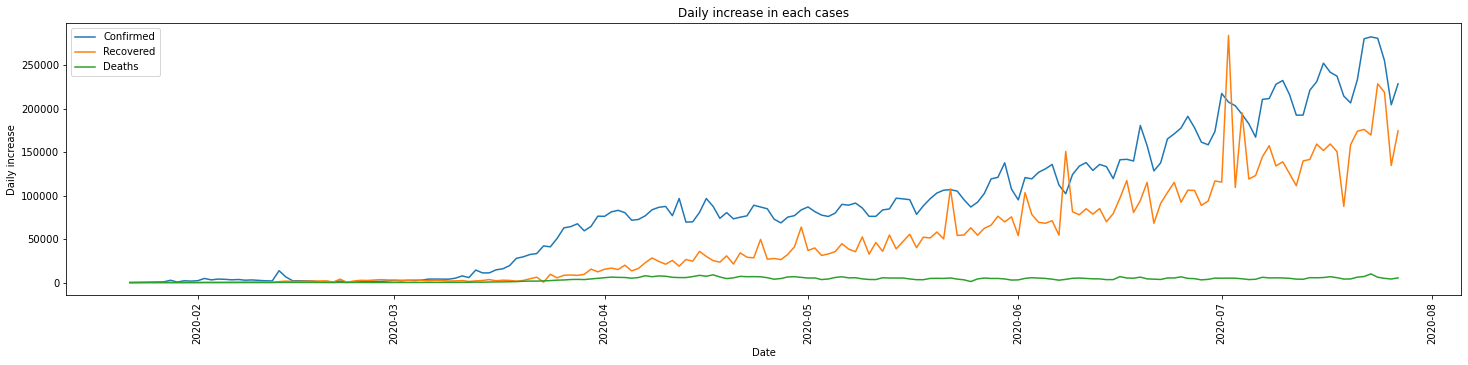

In [26]:
print('Average increase in number of confirmed cases everyday: ',np.round(byDate['Confirmed'].diff().fillna(0).mean()))
print('Average increase in number of recovered cases everyday: ',np.round(byDate['Recovered'].diff().fillna(0).mean()))
print('Average increase in number of deaths everyday:          ',np.round(byDate['Deaths'].diff().fillna(0).mean()))
print('\n\n')
plt.figure(figsize=(25,5))
plt.plot(byDate['Confirmed'].diff().fillna(0),label='Confirmed')
plt.plot(byDate['Recovered'].diff().fillna(0),label='Recovered')
plt.plot(byDate['Deaths'].diff().fillna(0),label='Deaths')
plt.xlabel('Date')
plt.ylabel('Daily increase')
plt.title('Daily increase in each cases')
plt.legend()
plt.xticks(rotation=90)
plt.show()

### Countrywise analysis of mortality rate

In [27]:
#mortality rate = number of deaths/number of confirmed cases

byCountry = covid19[covid19['Date']==covid19['Date'].max()].groupby(['Country/Region']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'}).sort_values(by='Confirmed',ascending=False)
byCountry['Mortality Rate'] = (byCountry['Deaths']/byCountry['Confirmed'])*100
byCountry['Recovery Rate'] = (byCountry['Recovered']/byCountry['Confirmed'])*100
byCountry

,Confirmed,Recovered,Deaths,Mortality Rate,Recovery Rate
Country/Region,,,,,
US,4290259,1325804,148011,3.449932,30.902656
Brazil,2442375,1846641,87618,3.587410,75.608414
India,1480073,951166,33408,2.257186,64.264803
Russia,816680,602249,13334,1.632708,73.743572
South Africa,452529,274925,7067,1.561668,60.753013
...,...,...,...,...,...
Dominica,18,18,0,0.000000,100.000000
Saint Kitts and Nevis,17,15,0,0.000000,88.235294
Greenland,14,13,0,0.000000,92.857143


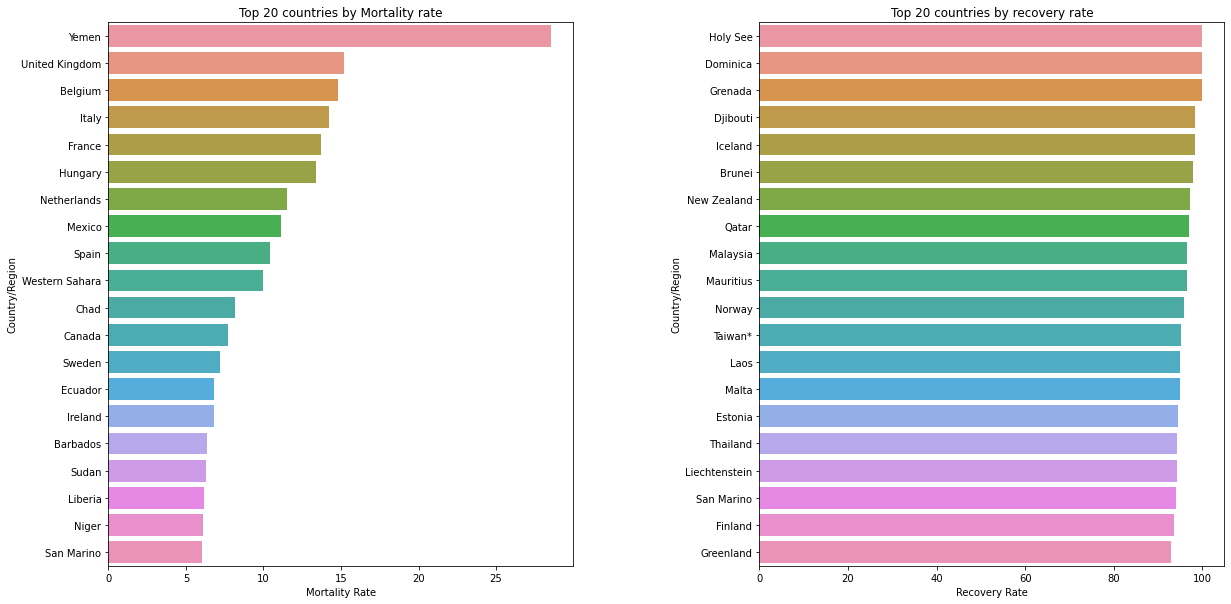

In [28]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
plt.subplots_adjust(hspace=1, wspace=0.4)
top_20_mortality_countries = byCountry.sort_values(by='Mortality Rate',ascending=False).head(20)
top_20_recovery_countries = byCountry.sort_values(by='Recovery Rate',ascending=False).head(20)
sns.barplot(x=top_20_mortality_countries['Mortality Rate'],y=top_20_mortality_countries.index,ax=ax1)
sns.barplot(x=top_20_recovery_countries['Recovery Rate'],y=top_20_recovery_countries.index,ax=ax2)
ax1.set_title('Top 20 countries by Mortality rate')
ax2.set_title('Top 20 countries by recovery rate')
plt.show()

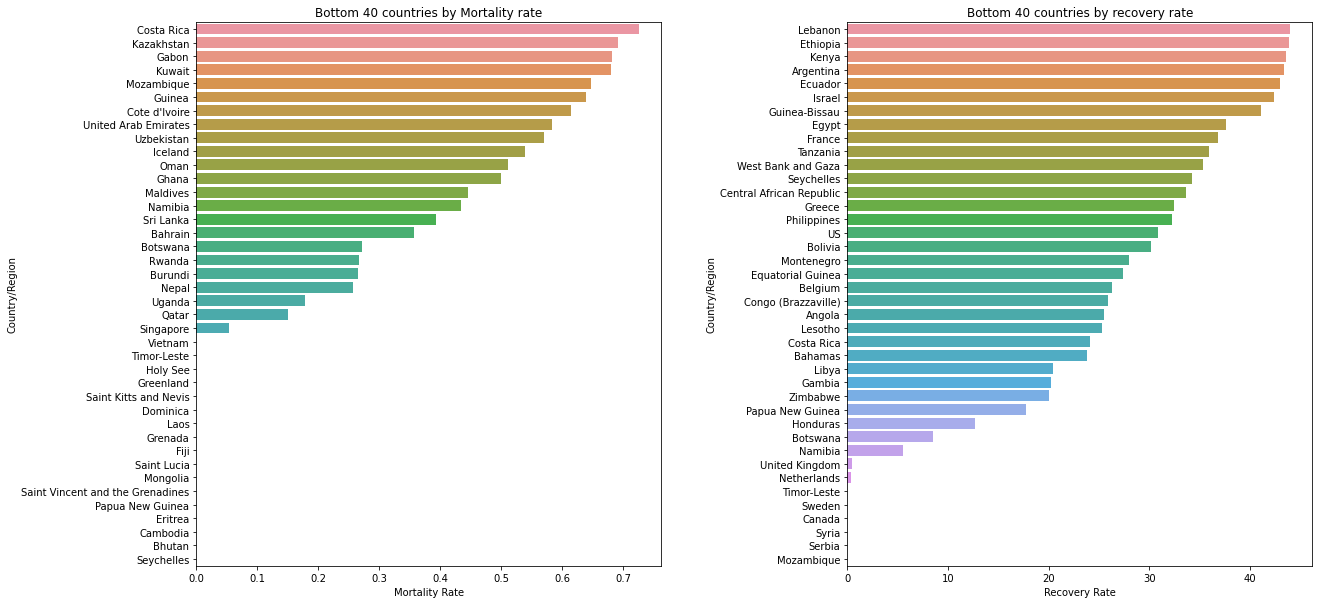

In [29]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
plt.subplots_adjust(hspace=1, wspace=0.4)
bottom_40_mortality_countries = byCountry.sort_values(by='Mortality Rate',ascending=False).tail(40)
bottom_40_recovery_countries = byCountry.sort_values(by='Recovery Rate',ascending=False).tail(40)
sns.barplot(x=bottom_40_mortality_countries['Mortality Rate'],y=bottom_40_mortality_countries.index,ax=ax1)
sns.barplot(x=bottom_40_recovery_countries['Recovery Rate'],y=bottom_40_recovery_countries.index,ax=ax2)
ax1.set_title('Bottom 40 countries by Mortality rate')
ax2.set_title('Bottom 40 countries by recovery rate')
plt.show()

### Covid19 cases of Top 20 Countries

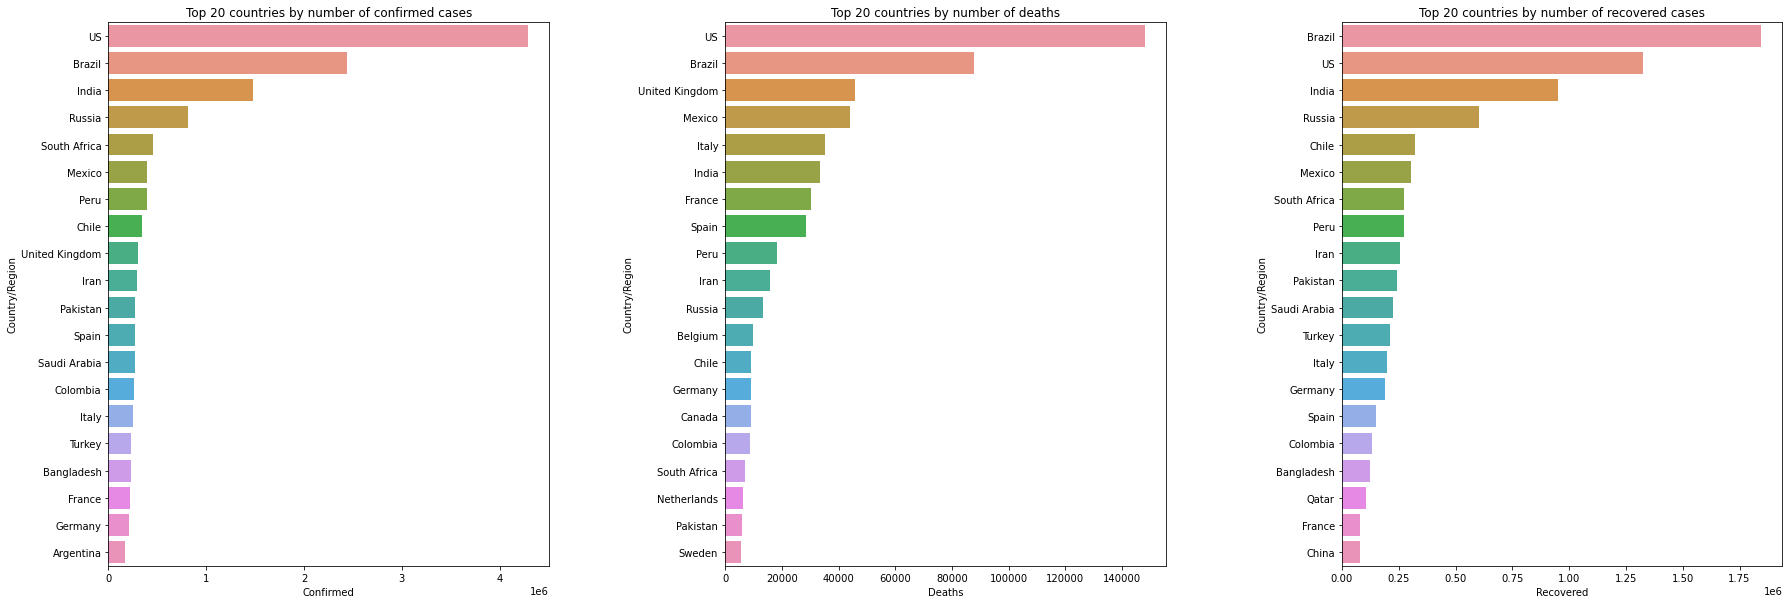

In [30]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,10))
plt.subplots_adjust(hspace=1, wspace=0.4)
top_20_confirmed_countries = byCountry.sort_values(by='Confirmed',ascending=False).head(20)
top_20_death_countries = byCountry.sort_values(by='Deaths',ascending=False).head(20)
top_20_recovered_countries = byCountry.sort_values(by='Recovered',ascending=False).head(20)
sns.barplot(x=top_20_confirmed_countries['Confirmed'],y=top_20_confirmed_countries.index,ax=ax1)
sns.barplot(x=top_20_death_countries['Deaths'],y=top_20_death_countries.index,ax=ax2)
sns.barplot(x=top_20_recovered_countries['Recovered'],y=top_20_recovered_countries.index,ax=ax3)
ax1.set_title('Top 20 countries by number of confirmed cases')
ax2.set_title('Top 20 countries by number of deaths')
ax3.set_title('Top 20 countries by number of recovered cases')
plt.show()

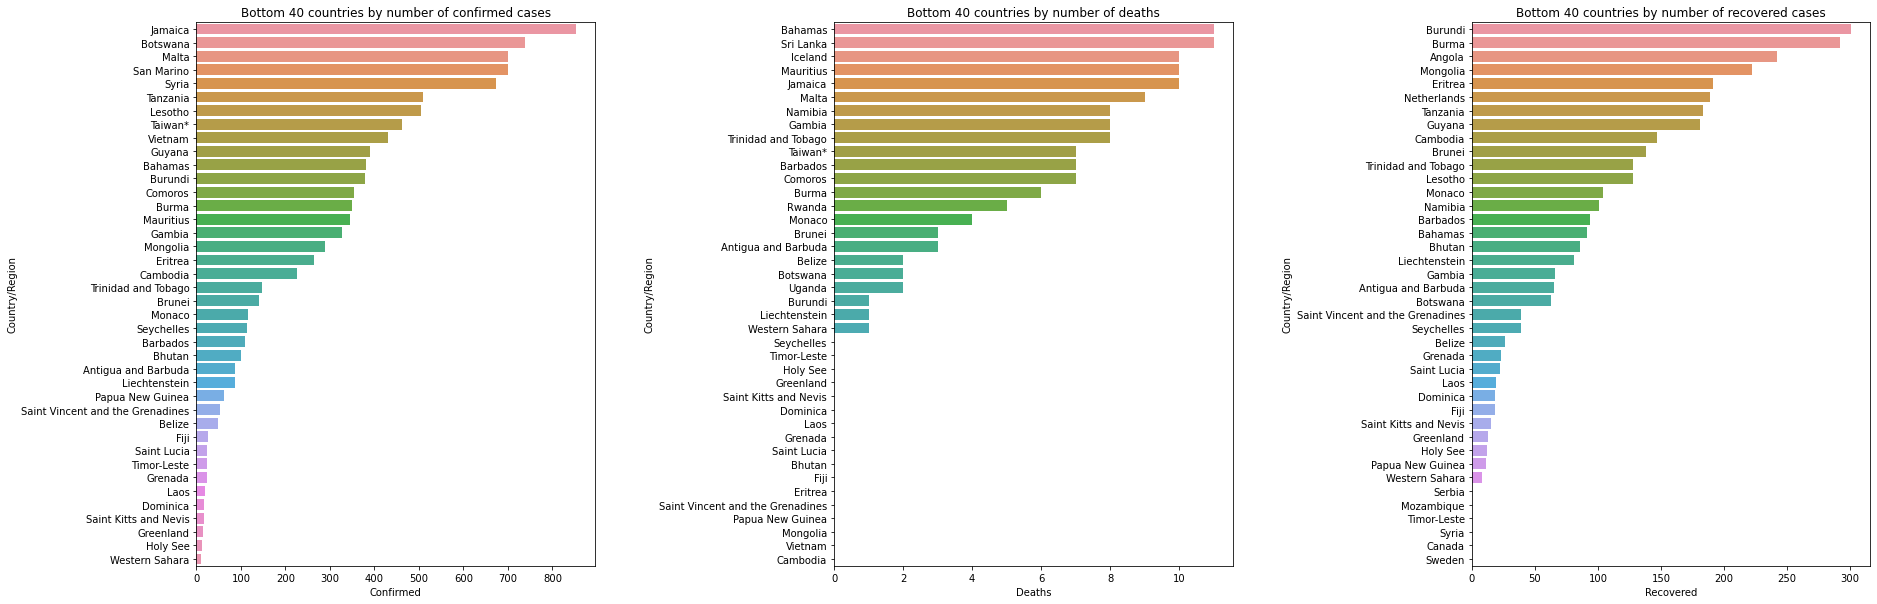

In [31]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,10))
plt.subplots_adjust(hspace=1, wspace=0.6)
bottom_40_confirmed_countries = byCountry.sort_values(by='Confirmed',ascending=False).tail(40)
bottom_40_death_countries = byCountry.sort_values(by='Deaths',ascending=False).tail(40)
bottom_40_recovered_countries = byCountry.sort_values(by='Recovered',ascending=False).tail(40)
sns.barplot(x=bottom_40_confirmed_countries['Confirmed'],y=bottom_40_confirmed_countries.index,ax=ax1)
sns.barplot(x=bottom_40_death_countries['Deaths'],y=bottom_40_death_countries.index,ax=ax2)
sns.barplot(x=bottom_40_recovered_countries['Recovered'],y=bottom_40_recovered_countries.index,ax=ax3)
ax1.set_title('Bottom 40 countries by number of confirmed cases')
ax2.set_title('Bottom 40 countries by number of deaths')
ax3.set_title('Bottom 40 countries by number of recovered cases')
plt.show()

## Model Building

### Splitting of Dataset

In [32]:
byDate['Days Since'] = byDate.index-byDate.index[0]
byDate['Days Since'] = byDate['Days Since'].dt.days
train_data = byDate.iloc[:int(byDate.shape[0]*0.95)]
test_data = byDate.iloc[int(byDate.shape[0]*0.95):]

In [33]:
#printing the training dat
train_data

,Confirmed,Deaths,Recovered,Weekly,Days Since
Date,,,,,
2020-01-22,555,17,28,4,0
2020-01-23,654,18,30,4,1
2020-01-24,941,26,36,4,2
2020-01-25,1434,42,39,4,3
2020-01-26,2118,56,52,4,4
...,...,...,...,...,...
2020-07-13,13107415,572808,7181139,29,173
2020-07-14,13328867,578468,7322897,29,174
2020-07-15,13559984,583961,7482320,29,175


In [34]:
#printing the testing data
test_data

,Confirmed,Deaths,Recovered,Weekly,Days Since
Date,,,,,
2020-07-18,14292198,602130,7944550,29,178
2020-07-19,14506845,606159,8032235,29,179
2020-07-20,14713623,610319,8190777,30,180
2020-07-21,14947078,616557,8364986,30,181
2020-07-22,15227725,623540,8541255,30,182
2020-07-23,15510481,633506,8710969,30,183
2020-07-24,15791645,639650,8939705,30,184
2020-07-25,16047190,644517,9158743,30,185
2020-07-26,16251796,648621,9293464,30,186


### Hyper Parameter Tuning for SVM Model

In [35]:
#Building the support vector regression model

kernel = ['poly','sigmoid','rbf']
C = [0.01,0.1,1,10]
gamma = [0.01,0.1,1]
epsilon = [0.01,0.1,1]
shrinking = [True,False]
svm_grid = {'kernel':kernel,'C':C,'gamma':gamma,'epsilon':epsilon,'shrinking':shrinking}
SVM = SVR()
svm_search = RandomizedSearchCV(SVM,svm_grid,cv=3)
svm_search.fit(np.array(train_data['Days Since']).reshape(-1,1),np.array(train_data['Confirmed']).reshape(-1,1))

C:\Users\Neethu\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Neethu\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Neethu\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Neethu\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Neethu\anaconda3\lib\site-packages\sklearn\utils\valida

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]})

In [36]:
#finding the best parameters
svm_search.best_params_

{'shrinking': False, 'kernel': 'poly', 'gamma': 1, 'epsilon': 0.1, 'C': 1}

In [41]:
#fitting model using hypertuned parameters
classifier = SVR(C=0.01, epsilon=1, gamma=1, kernel='poly', shrinking=False)
classifier.fit(np.array(train_data['Days Since']).reshape(-1,1),np.array(train_data['Confirmed']).reshape(-1,1))

C:\Users\Neethu\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=0.01, epsilon=1, gamma=1, kernel='poly', shrinking=False)

In [68]:
#predicting the testing set values
prediction_SVM = classifier.predict(np.array(test_data['Days Since']).reshape(-1,1))
prediction_SVM

array([14623758.54350746, 14871201.0815934 , 15121423.83879555,
       15374442.35478676, 15630272.15605629, 15888928.77721107,
       16150427.7559098 , 16414784.61516273, 16682014.88866127,
       16952134.11320961])

In [72]:
expected_SVM = np.array(test_data['Confirmed'])
expected_SVM

array([14292198, 14506845, 14713623, 14947078, 15227725, 15510481,
       15791645, 16047190, 16251796, 16480485], dtype=int64)

In [43]:
#Performance evaluation of SVM model for test data
print('MAE of Test data:', metrics.mean_absolute_error(np.array(test_data['Confirmed']).reshape(-1,1),prediction_SVM))
print('MSE of Test data:', metrics.mean_squared_error(np.array(test_data['Confirmed']).reshape(-1,1),prediction_SVM))
print('RMSE of Test data:', np.sqrt(metrics.mean_squared_error(np.array(test_data['Confirmed']).reshape(-1,1),prediction_SVM)))

MAE of Test data: 394032.2124893941
MSE of Test data: 156828854218.19394
RMSE of Test data: 396016.2297408958


In [44]:
#predicting the training data
prediction_SVM_train = classifier.predict(np.array(train_data['Days Since']).reshape(-1,1))

In [46]:
#Performance evaluation of SVM model for training data
print('MAE of Train data:', metrics.mean_absolute_error(np.array(train_data['Confirmed']).reshape(-1,1),prediction_SVM_train))
print('MSE of Train Data:', metrics.mean_squared_error(np.array(train_data['Confirmed']).reshape(-1,1),prediction_SVM_train))
print('RMSE of Train Data:', np.sqrt(metrics.mean_squared_error(np.array(train_data['Confirmed']).reshape(-1,1),prediction_SVM_train)))

MAE of Train data: 283624.2113436416
MSE of Train Data: 142234006242.86462
RMSE of Train Data: 377139.23986090947


### Random Forest Model

### HyperParameter Tuning for Random Forest Model

In [47]:
#Building the random forest model
RF_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

RF = RandomForestRegressor()
RF_search = RandomizedSearchCV(RF,RF_grid,cv=3)
RF_search.fit(np.array(train_data['Days Since']).reshape(-1,1),np.array(train_data['Confirmed']).reshape(-1,1))

C:\Users\Neethu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Neethu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Neethu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Neethu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Neethu\anac

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [48]:
#best parameters
RF_search.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [49]:
RF_confirmed = RF_search.best_estimator_
RF_confirmed

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      n_estimators=1600)

In [50]:
#predicted values
prediction_RF = RF_confirmed.predict(np.array(test_data['Days Since']).reshape(-1,1))
prediction_RF

array([14054563., 14054563., 14054563., 14054563., 14054563., 14054563.,
       14054563., 14054563., 14054563., 14054563.])

In [51]:
#true values
expected_RF = np.array(test_data['Confirmed'])
expected_RF

array([14292198, 14506845, 14713623, 14947078, 15227725, 15510481,
       15791645, 16047190, 16251796, 16480485], dtype=int64)

In [66]:
prediction_RF_train = RF_confirmed.predict(np.array(train_data['Days Since']).reshape(-1,1))

In [55]:
#performance evaluation of Random Forest Model on testing data
print('MAE of Test data:', metrics.mean_absolute_error(np.array(test_data['Confirmed']).reshape(-1,1),prediction_RF))
print('MSE of Test data:', metrics.mean_squared_error(np.array(test_data['Confirmed']).reshape(-1,1),prediction_RF))
print('RMSE of Test data:', np.sqrt(metrics.mean_squared_error(np.array(test_data['Confirmed']).reshape(-1,1),prediction_RF)))

MAE of Test data: 1322343.6
MSE of Test data: 2268892545276.8
RMSE of Test data: 1506284.3507375359


In [67]:
#performance evaluation of Random Forest Model on training data
print('MAE of Train data:', metrics.mean_absolute_error(np.array(train_data['Confirmed']).reshape(-1,1),prediction_RF_train))
print('MSE of Train Data:', metrics.mean_squared_error(np.array(train_data['Confirmed']).reshape(-1,1),prediction_RF_train))
print('RMSE of Train Data:', np.sqrt(metrics.mean_squared_error(np.array(train_data['Confirmed']).reshape(-1,1),prediction_RF_train)))

MAE of Train data: 0.0
MSE of Train Data: 0.0
RMSE of Train Data: 0.0


### Gradient Boost Model

### HyperParameter Tuning for Gradient Boost Model

In [57]:
#Building the gradient boost model
GB_grid = {
    'n_estimators':[100,500], 
    'learning_rate': [0.1,0.05,0.02],
    'max_depth':[4], 
    'min_samples_leaf':[3], 
    'max_features':[1.0]
}
GB = GradientBoostingRegressor()
GB_search = RandomizedSearchCV(GB,GB_grid,cv=3)
GB_search.fit(np.array(train_data['Days Since']).reshape(-1,1),np.array(train_data['Confirmed']).reshape(-1,1))

C:\Users\Neethu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning:

The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.

C:\Users\Neethu\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Neethu\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Neethu\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Neethu\anaconda3\lib\site-packages\sklearn\utils\validation.py:73:

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.1, 0.05, 0.02],
                                        'max_depth': [4], 'max_features': [1.0],
                                        'min_samples_leaf': [3],
                                        'n_estimators': [100, 500]})

In [58]:
#best parameters
GB_search.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 3,
 'max_features': 1.0,
 'max_depth': 4,
 'learning_rate': 0.1}

In [59]:
#model building
GB_confirmed = GB_search.best_estimator_
GB_confirmed

GradientBoostingRegressor(max_depth=4, max_features=1.0, min_samples_leaf=3)

In [60]:
#predicted values
prediction_GB = GB_confirmed.predict(np.array(test_data['Days Since']).reshape(-1,1))
prediction_GB

array([13808619.75168408, 13808619.75168408, 13808619.75168408,
       13808619.75168408, 13808619.75168408, 13808619.75168408,
       13808619.75168408, 13808619.75168408, 13808619.75168408,
       13808619.75168408])

In [61]:
#true values
expected_GB = np.array(test_data['Confirmed'])
expected_GB

array([14292198, 14506845, 14713623, 14947078, 15227725, 15510481,
       15791645, 16047190, 16251796, 16480485], dtype=int64)

In [64]:
#prediction of training data
prediction_GB_train = GB_confirmed.predict(np.array(train_data['Days Since']).reshape(-1,1))

In [62]:
#performance evaluation of Gradient Boosted model on testing data
print('MAE of Test data:', metrics.mean_absolute_error(np.array(test_data['Confirmed']).reshape(-1,1),prediction_GB))
print('MSE of Test data:', metrics.mean_squared_error(np.array(test_data['Confirmed']).reshape(-1,1),prediction_GB))
print('RMSE of Test data:', np.sqrt(metrics.mean_squared_error(np.array(test_data['Confirmed']).reshape(-1,1),prediction_GB)))

MAE of Test data: 1568286.8483159193
MSE of Test data: 2979823587416.519
RMSE of Test data: 1726216.5528740939


In [65]:
#performance evaluation of Gradient Boosted model on testing data
print('MAE of Test data:', metrics.mean_absolute_error(np.array(train_data['Confirmed']).reshape(-1,1),prediction_GB_train))
print('MSE of Test data:', metrics.mean_squared_error(np.array(train_data['Confirmed']).reshape(-1,1),prediction_GB_train))
print('RMSE of Test data:', np.sqrt(metrics.mean_squared_error(np.array(train_data['Confirmed']).reshape(-1,1),prediction_GB_train)))

MAE of Test data: 3614.6271997945178
MSE of Test data: 689259808.9767764
RMSE of Test data: 26253.75799722349


## Prediction using SVM Model

In [63]:
#Prediction for next 10 days using SVM Model

new_date = []
new_prediction_SVM = []

for i in range(1,150):
  new_date.append(byDate.index[-1]+timedelta(days=i))
  new_prediction_SVM.append(svm_confirmed.predict(np.array(byDate['Days Since'].max()+i).reshape(-1,1))[0])
pd.set_option('display.float_format',lambda x: '%.f'%x)
model_predictions = pd.DataFrame(zip(new_date,new_prediction_SVM,),columns=['Dates','SVR'])
model_predictions.head(10)

,Dates,SVR
0,2020-07-28,18816714
1,2020-07-29,19118549
2,2020-07-30,19423596
3,2020-07-31,19731871
4,2020-08-01,20043390
5,2020-08-02,20358172
6,2020-08-03,20676232
7,2020-08-04,20997588
8,2020-08-05,21322258
9,2020-08-06,21650257
